#### ggplot2 패키지
- Hadley wickham이 개발한 가장 대표적이고 강력한 시각화 패키지.
- 기초 문법을 활용한 직관적이고 높은 완성도의 그래프 작업 가능.
- 레이어를 추가하는 방식으로 다양한 시각화 작업 구현.

- aes() : 그래프의 x, y 축을 지정하는 함수.
    - colour : 색을 지정. 
    - group : 각 행마다 그래프를 그리는 것이 가능.
- qplot : geom = 'bar', 'boxplot' 등의 지정이 가능.
- last_plot() : 마직막에 그린 plot을 그려줌.
- coord_flip() : Boxplot을 가로로 표현.
- legend() : 범례 추가.
- axis() : x, y축 추가 가능.
<br>
- geom_line() : ggplot에서 선 그래프를 그리는 함수.
    - colour : 선의 색상을 지정.
    - size : 선의 굵기 지정.
    - linetype : 선 형태를 지정.
        - 1 : 실선
        - 2 : 선이 긴 점선
        - 3 : 선이 짧은 점선
        - 4 : 선이 길고 짦음이 반복되는 점선
- geom_hline() : ggplot에서 임의의 선 그래프를 삽입하는 함수.
    - yintercept : 선을 그을 y축 값.
- geom_point() : ggplot에서 포인트 그래프를 그리는 함수.
    - shape :  포인트에 변수에 따른 모양을 할당. 특정 문자 형태로도 할당이 가능.
    - colour = factor(변수) : 변수에 따른 색상 할당.
    - coord_cartesian : y축의 범위 지정.
    - scale_color_continuous : hp의 범위를 지정하는 옵션.
    - guides(colour='colourbar') : hp의 수치에 따른 색의 범위를 알려줌.
    - aes(size=변수) : 점의 크기를 변수 별로 다르게 표현 가능. 
- geom_pointrange() : ggplot에서 포인트 범위 그래프를 그리는 함수.
- geom_smooth() : ggplot에서 스무스 그래프를 그리는 함수. 
    - alpha : 투명도 조절이 가능.
    - size : 선의 굵기 등의 조절이 가능.
    - scale_x_continuous(limits=c(325, 500)) : limits로 범위를 지정해 원하는 범위에서만 그래프를 그릴 수 있음.
<br>
- geom_bar() : ggplot에서 막대 그래프를 그리는 함수.
    - factor() : 범주화 가능.
    - fill : 막대의 내부 색상을 지정.
    - colour : 막대의 테두리 색상을 지정.
    - aes(order=desc(변수) : 변수를 내림차순으로 정렬하고 표시.
- geom_histogram() : ggplot에서 히스토그램을 그리는 함수.
    -  binwidth : x 구간의 간격을 설정.
- facet_grid(Diet~.) : 가로로 출력.(가로로 꽉차고, 세로로 분할되어 정렬되는 형태.)
- facet_grid(.~Diet) : 세로로 출력.(세로로 꽉차고, 가로로 분할되어 정렬되는 형태.)

#### aplpack 패키지
- 줄기-잎 그림, 체르노프 페이스, 스타차트 등의 시각화 방법을 제공.

- stem.leaf() : 줄기-잎 그림을 그려주는 함수.
- faces() : 얼굴 그림을 그려주는 함수.
- stars() : 별 그림을 그려주는 함수.

In [148]:
# 내장 데이터 가져오기.
data(mtcars)
data(pressure)
data(BOD)
data(pg_mean)
data(cabbage_exp)
data(ChickWeight)
data(economics)
data(WorldPhones)
data(Fruits)

#### 포인트 그래프(Point Graph)

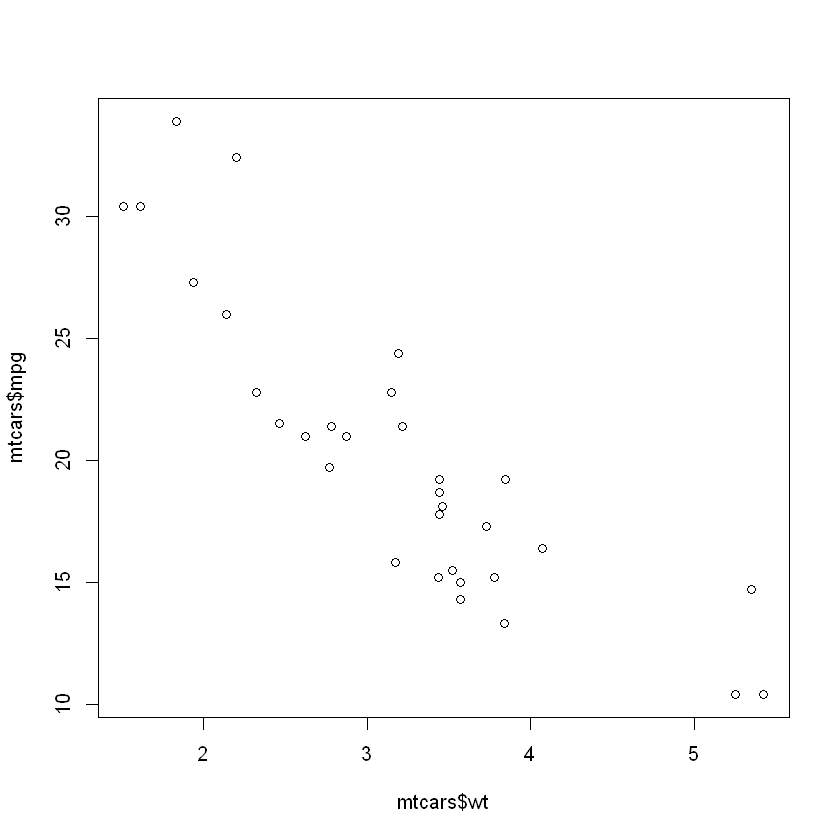

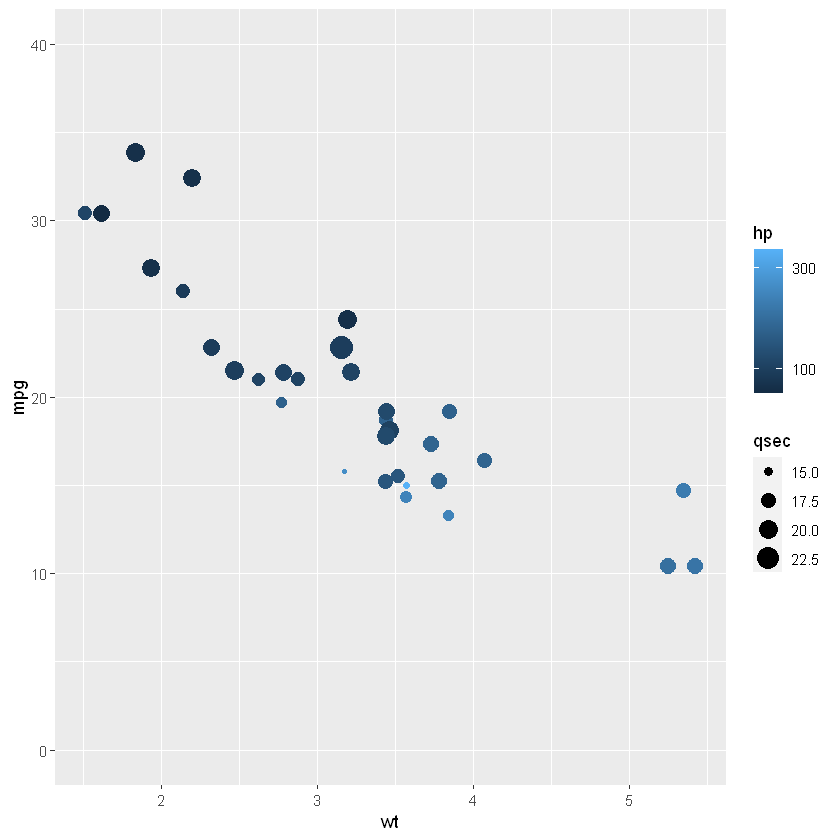

In [53]:
# 기본 함수.
plot(mtcars$wt, mtcars$mpg)

# ggplot2
# install.packages('ggplot2')
library(ggplot2)
# qplot(mtcars$wt, mtcars$mpg)
# qplot(wt, mpg, data=mtcars)
ggplot(mtcars, aes(x=wt, y=mpg, colour=hp)) + geom_point(aes(size=qsec)) + coord_cartesian(ylim = c(0,40)) +
scale_color_continuous(breaks=c(100, 300)) + guides(colour='colourbar')

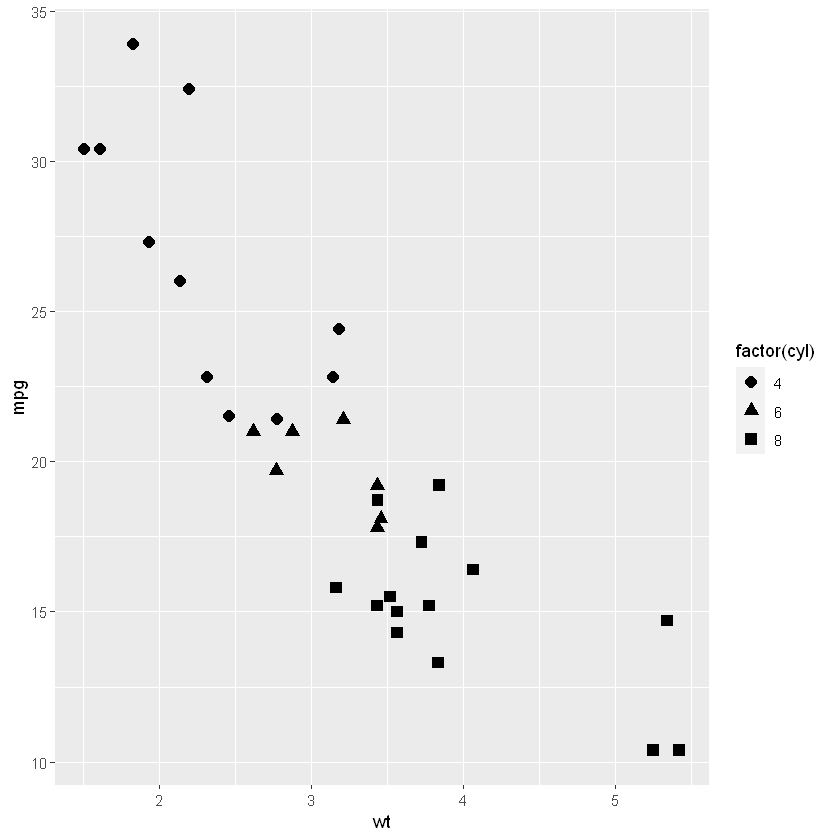

In [52]:
ggplot(mtcars, aes(wt, mpg)) + geom_point(aes(shape=factor(cyl)), size=3)

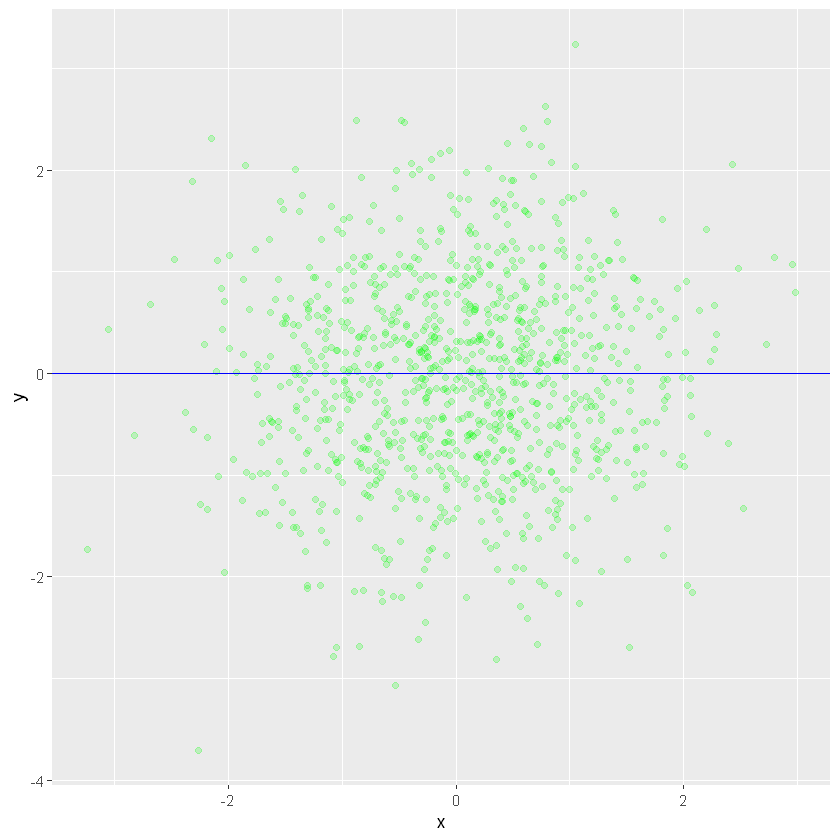

In [62]:
df = data.frame(x=rnorm(1000), y=rnorm(1000))
ggplot(df, aes(x, y)) + geom_point(colour='green', alpha=0.2) + geom_hline(yintercept = 0, size=0.5, colour='blue')

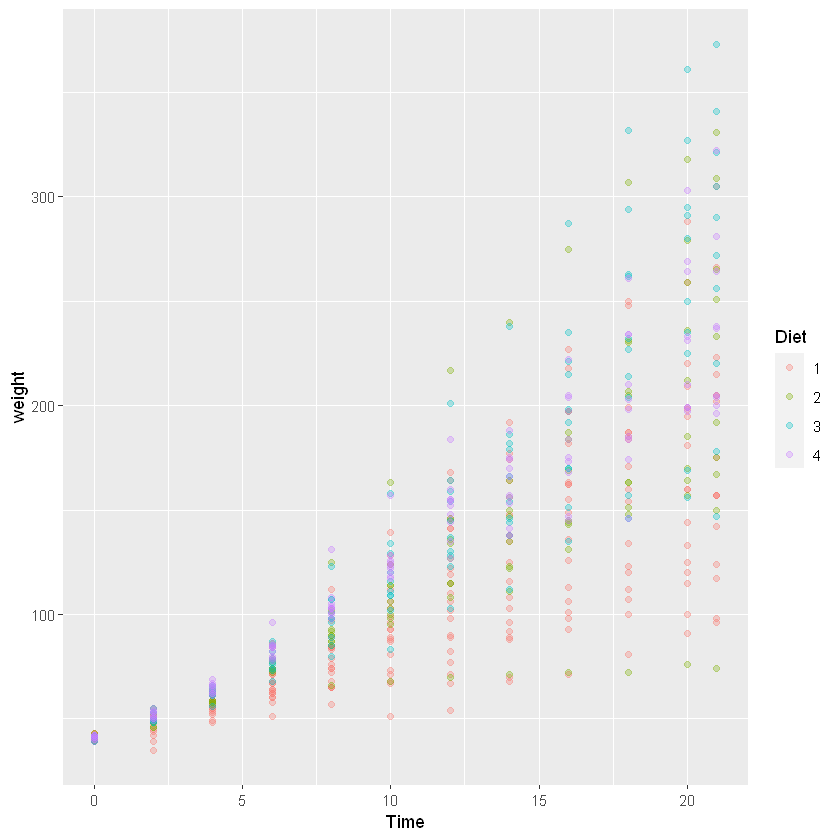

In [61]:
ggplot(ChickWeight, aes(x=Time, y=weight, colour=Diet)) + geom_point(alpha=0.3) 

#### 선 그래프(Line Graph)

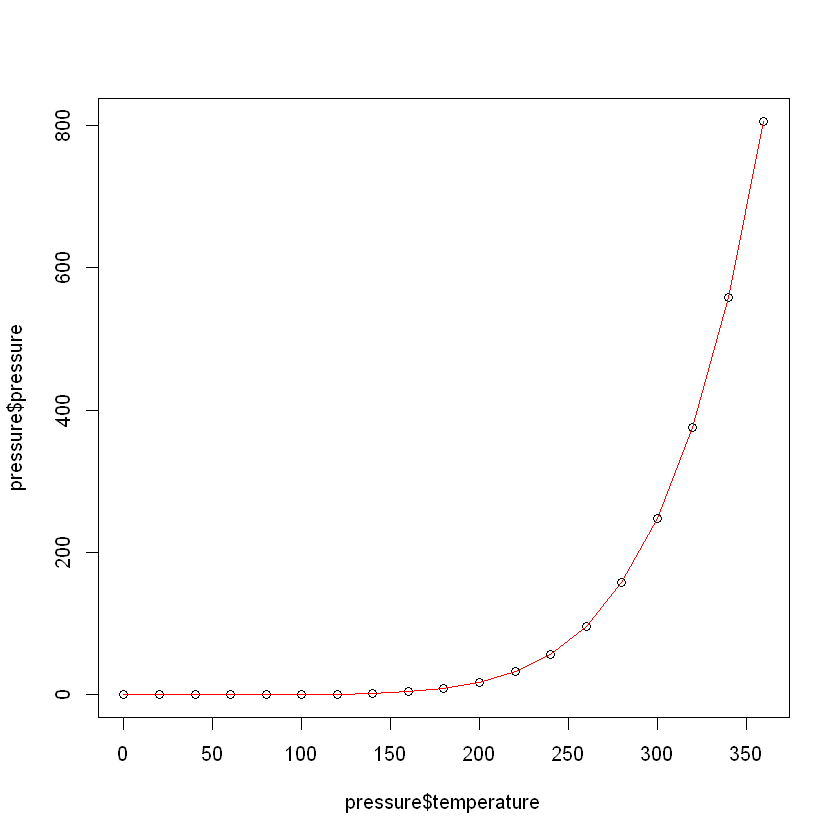

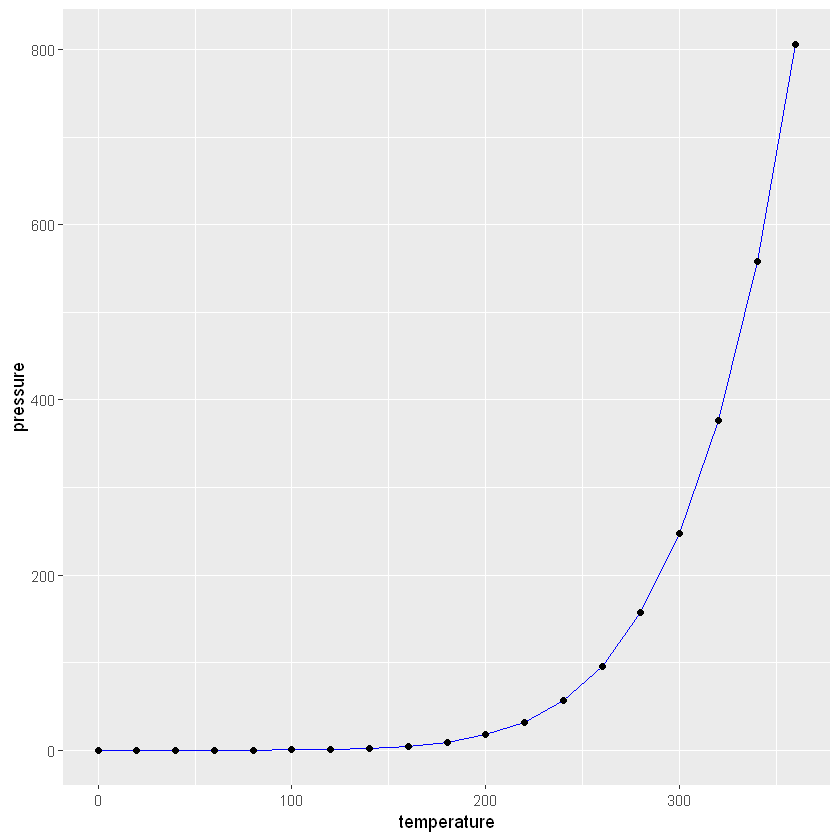

In [13]:
# 기본 선 그래프.
# type='l'
plot(pressure$temperature, pressure$pressure)
lines(pressure$temperature, pressure$pressure, col='red')
# ggplot2.
ggplot(pressure, aes(x=temperature, y=pressure)) + geom_line(colour='blue')+geom_point()

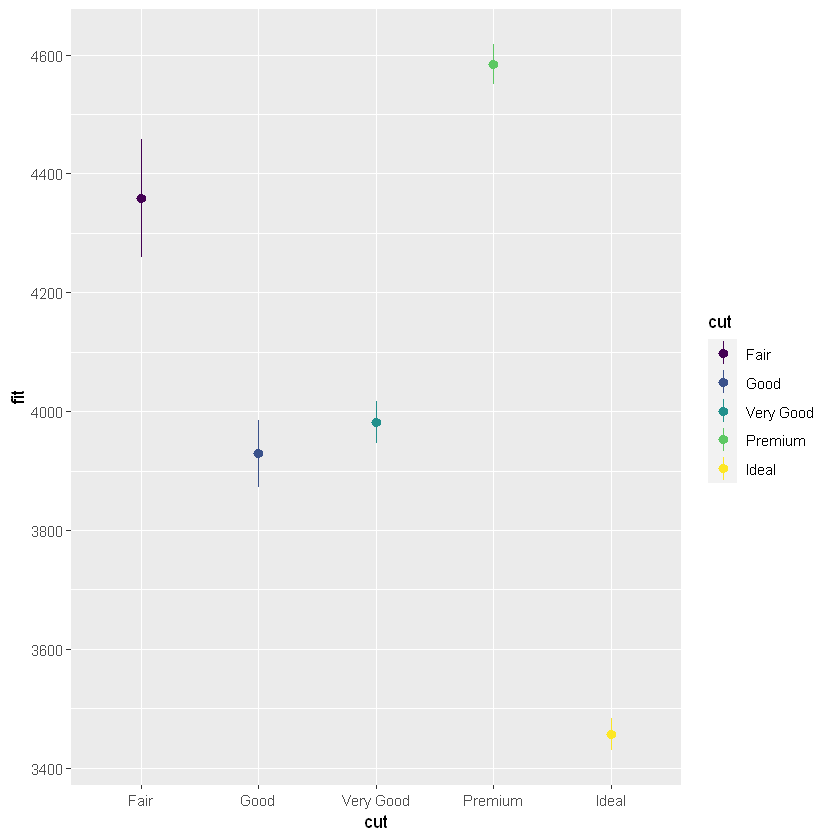

In [68]:
# 선형모델링.
# cut 정보를 이용해 가격을 예측하는 선형 모델링을 수행해 값의 범위를 point range로 그래프로 표현 가능.
mod = lm(price ~ cut, diamonds)
cuts = data.frame( cut=unique(diamonds$cut), predict(mod, data.frame(cut=unique(diamonds$cut)), se=TRUE)[ c('fit','se.fit')] )
ggplot(cuts, aes(x=cut, y=fit, ymin=fit-se.fit, ymax=fit+se.fit, colour=cut)) + geom_pointrange()

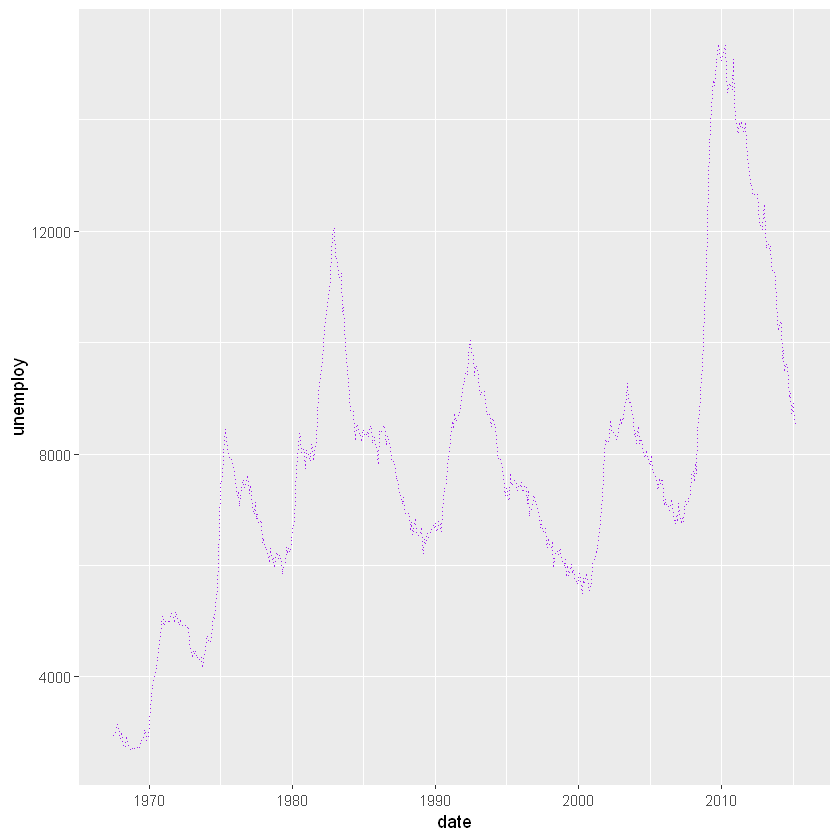

In [43]:
ggplot(economics, aes(x=date, y=unemploy)) + geom_line(colour='purple', size=0.3, linetype=3)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'
Warning message:
"Removed 24 rows containing non-finite values (stat_smooth)."

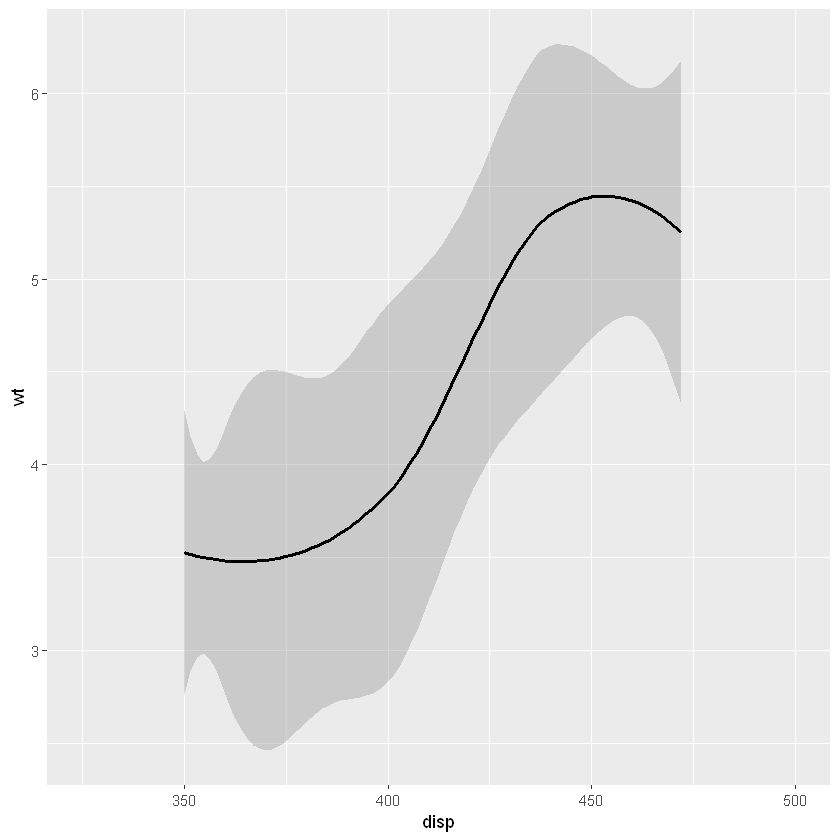

In [73]:
ggplot(mtcars, aes(x=disp, y=wt)) + geom_smooth(colour='black') + scale_x_continuous(limits=c(325, 500))

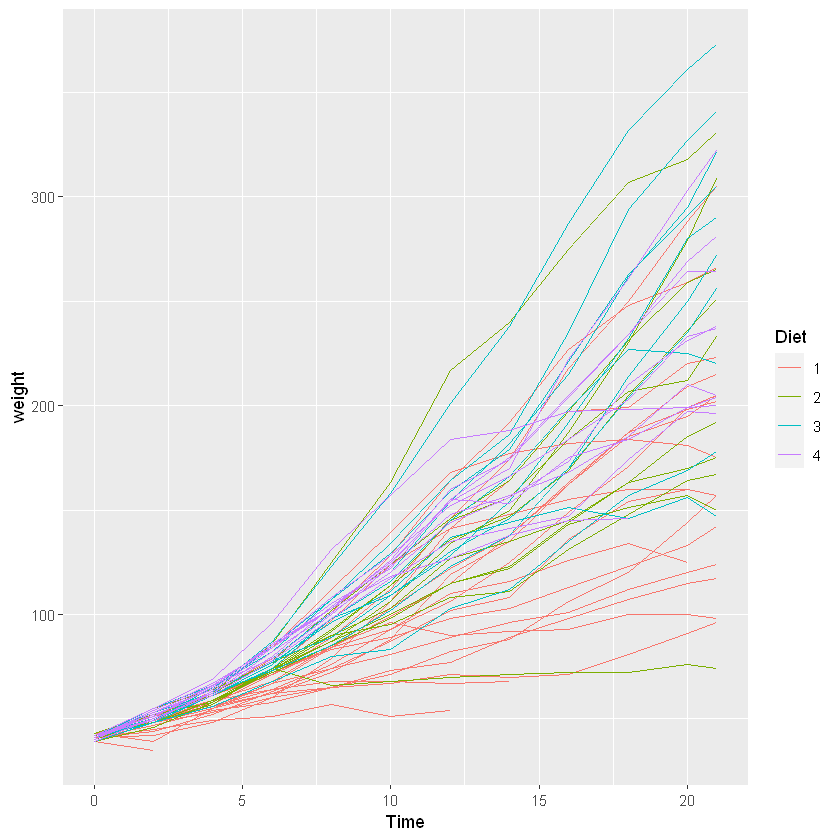

In [14]:
ggplot(ChickWeight, aes(x=Time, y=weight, colour=Diet, gruop=Chick)) + geom_line()

#### 스무스 그래프(Smooth Graph)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


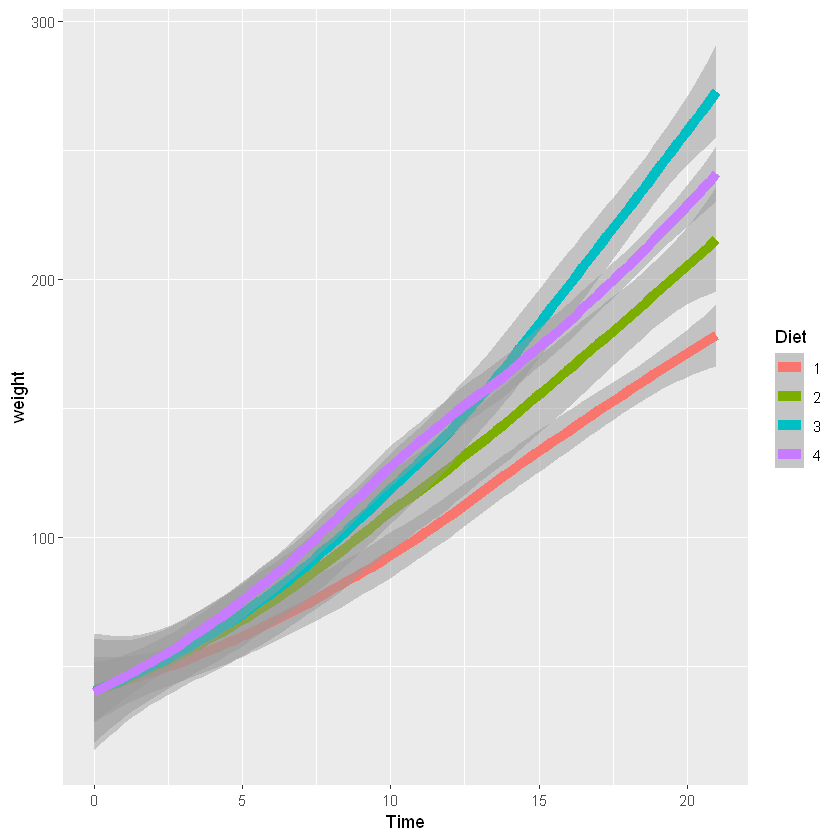

In [24]:
ggplot(ChickWeight, aes(x=Time, y=weight, colour=Diet)) + geom_smooth(alpha=0.5, size=3)

#### 막대 그래프(Bar Graph)

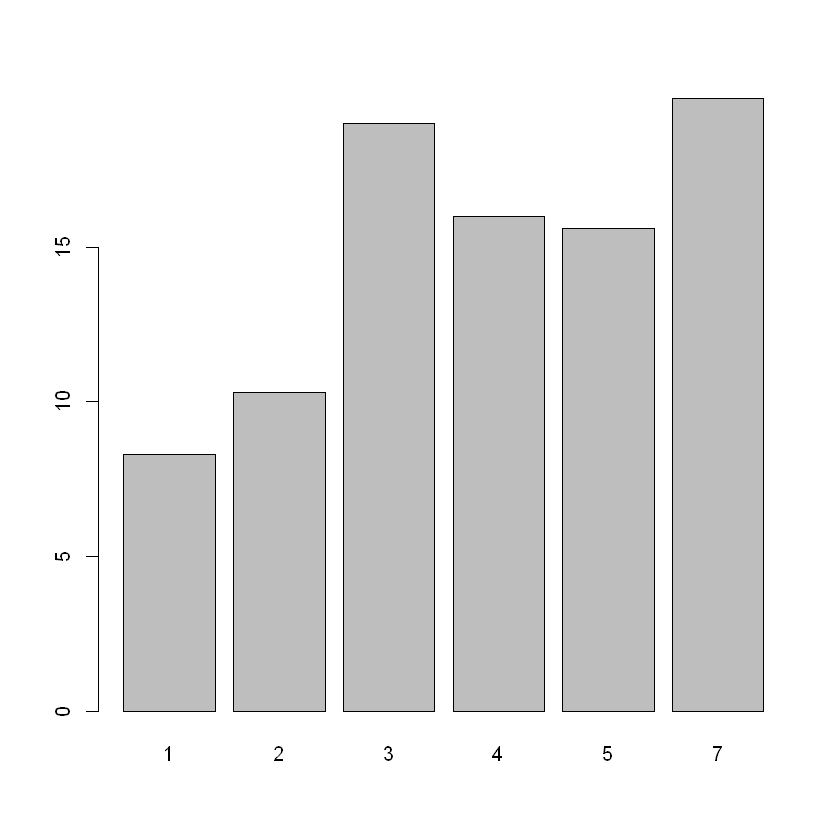

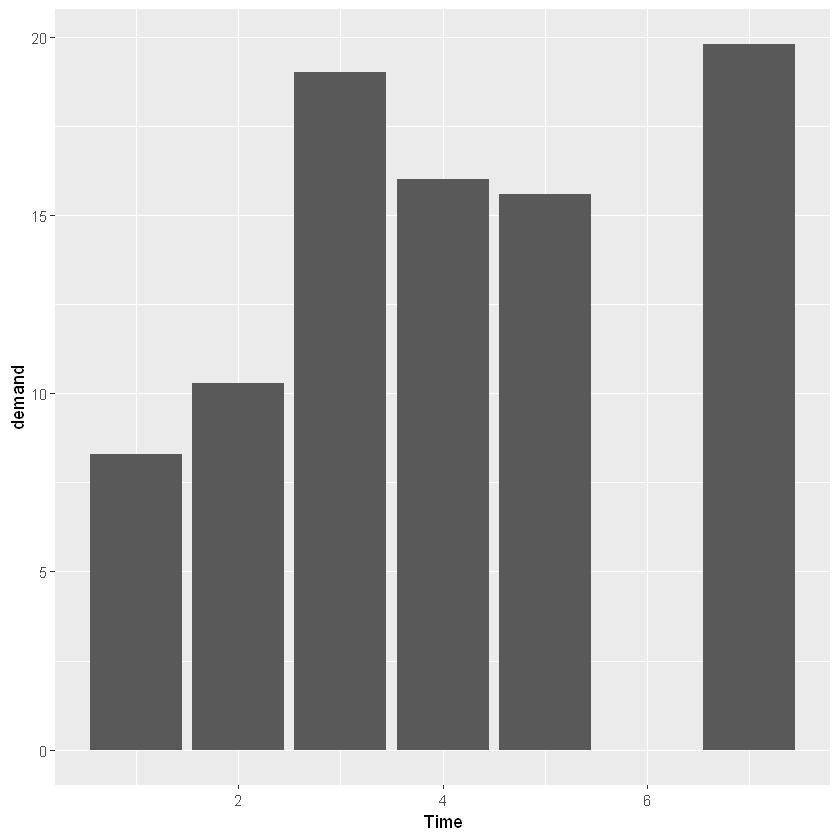

In [7]:
# 기본 함수.
barplot(BOD$demand, names.arg = BOD$Time)

# ggplot2
ggplot(BOD, aes(x=Time, y=demand)) + geom_bar(stat = 'identity' )

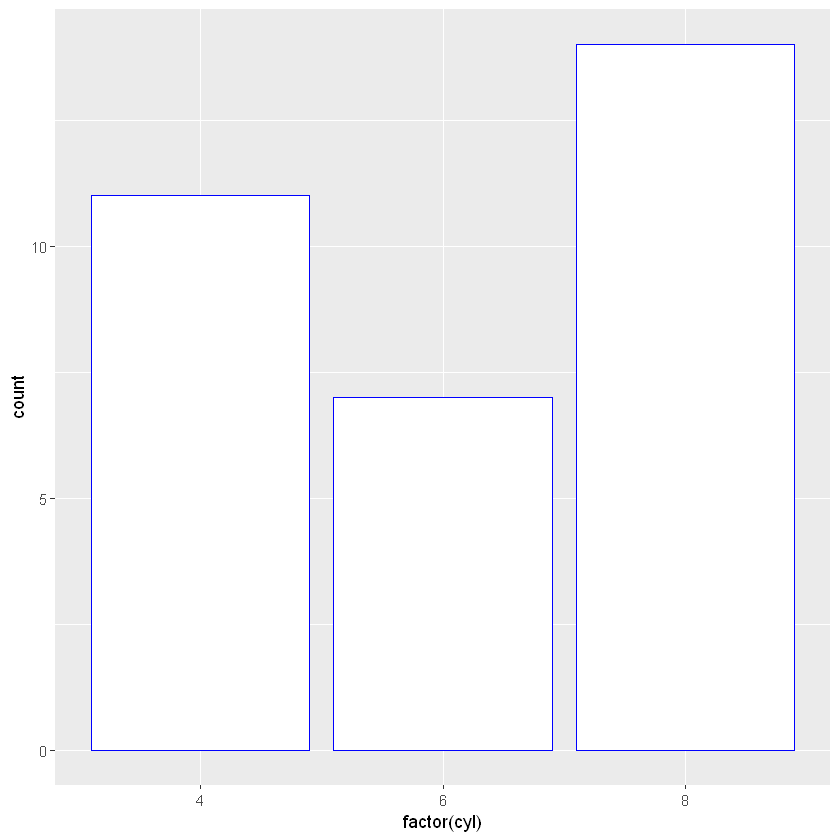

In [40]:
# cyl 변수와 같이 범주형 데이터를 factor화 해줌.
ggplot(mtcars, aes(factor(cyl))) + geom_bar(fill='white', colour='blue')

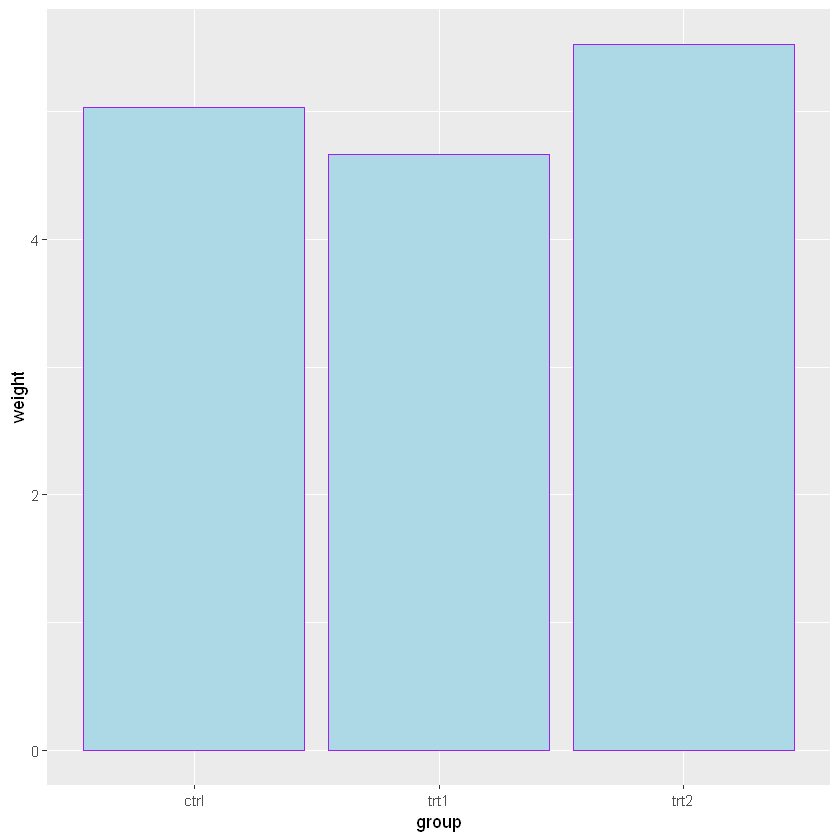

In [8]:
# install.packages('gcookbook')
library(gcookbook)
ggplot(pg_mean, aes(x=group, y=weight)) + geom_bar(stat='identity',
                                    fill='lightblue', colour = 'purple' )

Warning message:
"Ignoring unknown aesthetics: order"

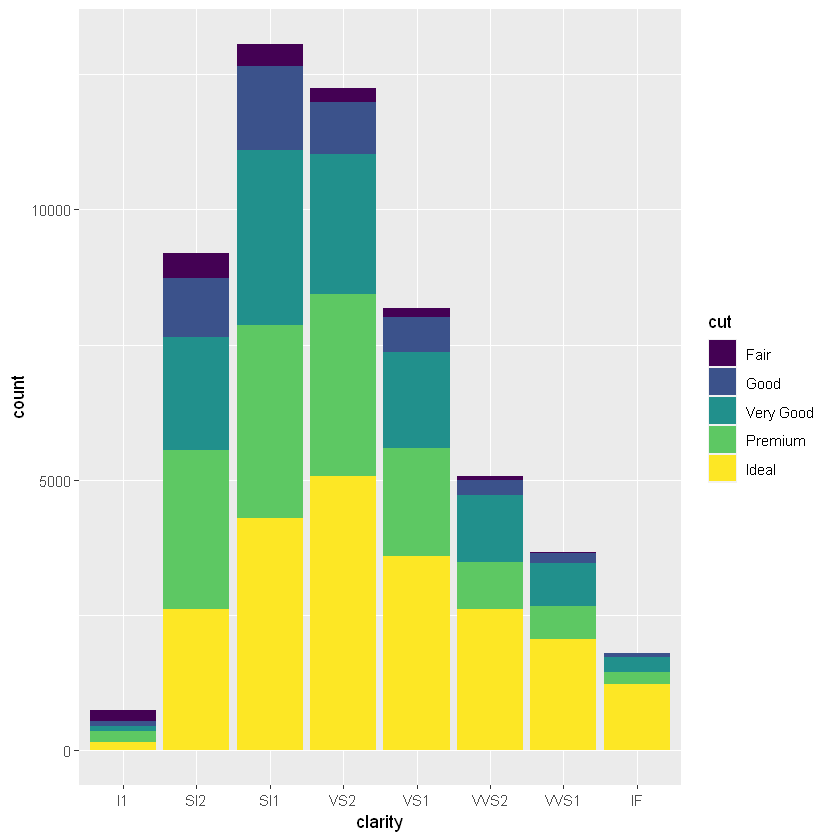

In [46]:
ggplot(diamonds, aes(clarity, fill=cut)) + geom_bar(aes(order=desc(cut)))

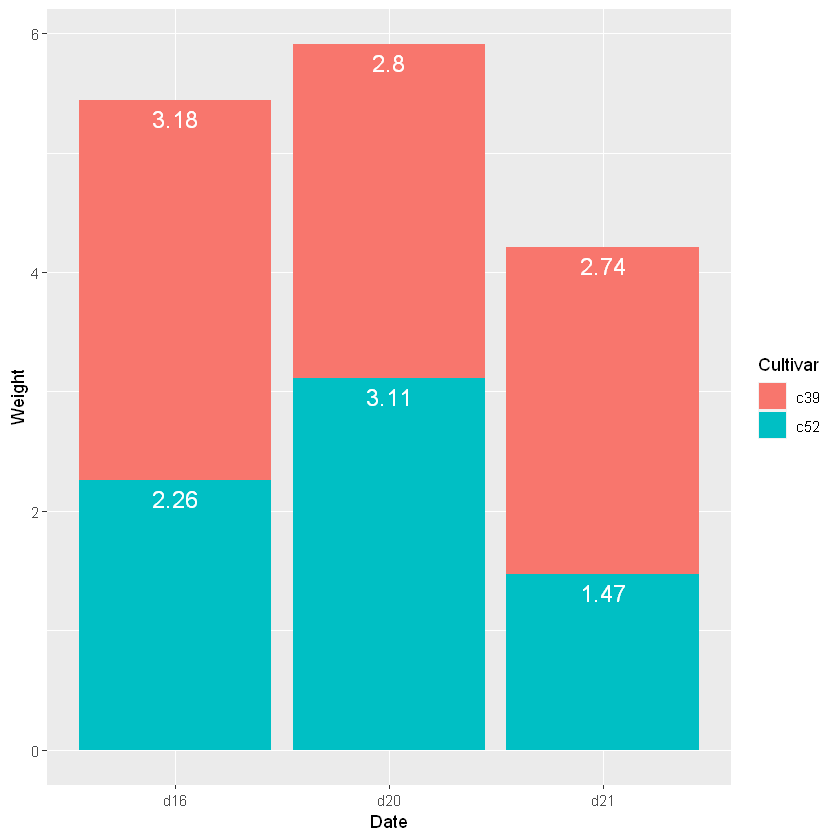

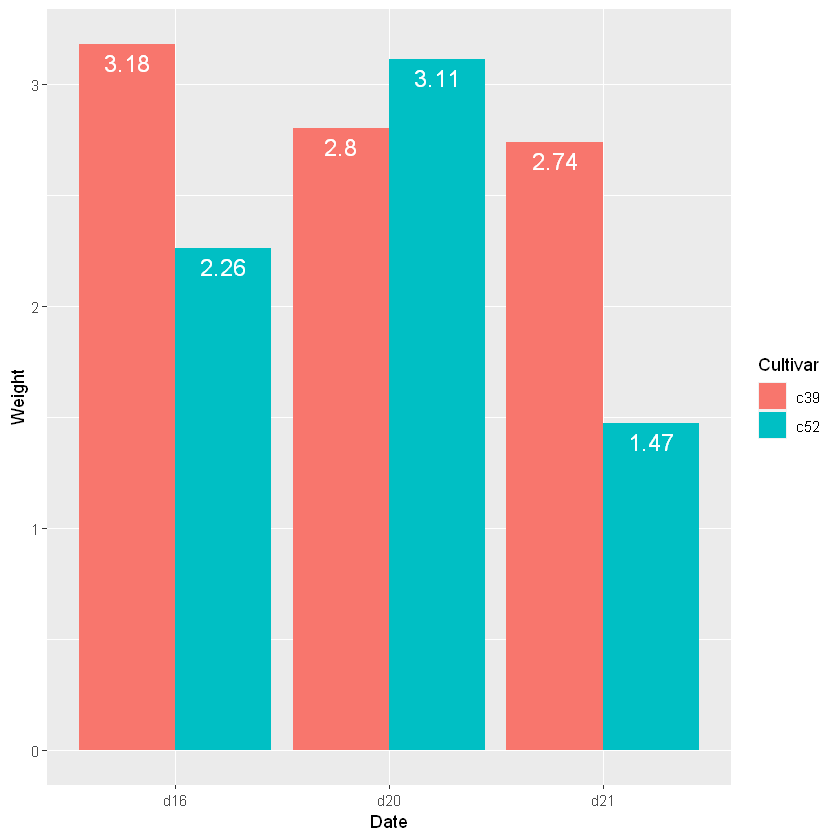

In [9]:
# 요인 설정.
library(plyr)
ce = arrange(cabbage_exp, Date, desc(Cultivar))

# ddply : dateframe을 dataframe을 내보내는 함수.
ce = ddply(ce, "Date", transform, label_y = cumsum(Weight))
ggplot(ce, aes(x=Date, y=Weight, fill=Cultivar)) + geom_bar(stat='identity') +
geom_text(aes(y = label_y , label=Weight), vjust=1.5, colour='white', size=5) 

ggplot(cabbage_exp, aes(x=Date, y=Weight, fill=Cultivar)) + geom_bar(stat='identity',position = 'dodge') + 
geom_text(aes(label=Weight), vjust=1.5, colour='white', size=5, position = position_dodge(0.9)) 

#### 상자 그림(Box Plot)

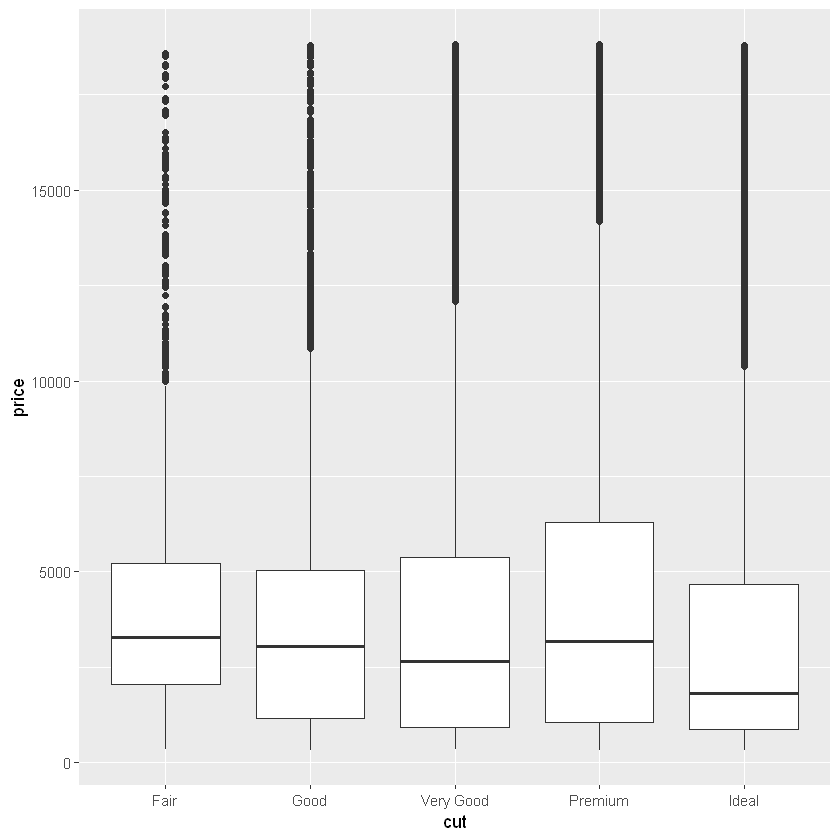

In [75]:
qplot(cut, price, data=diamonds, geom='boxplot')

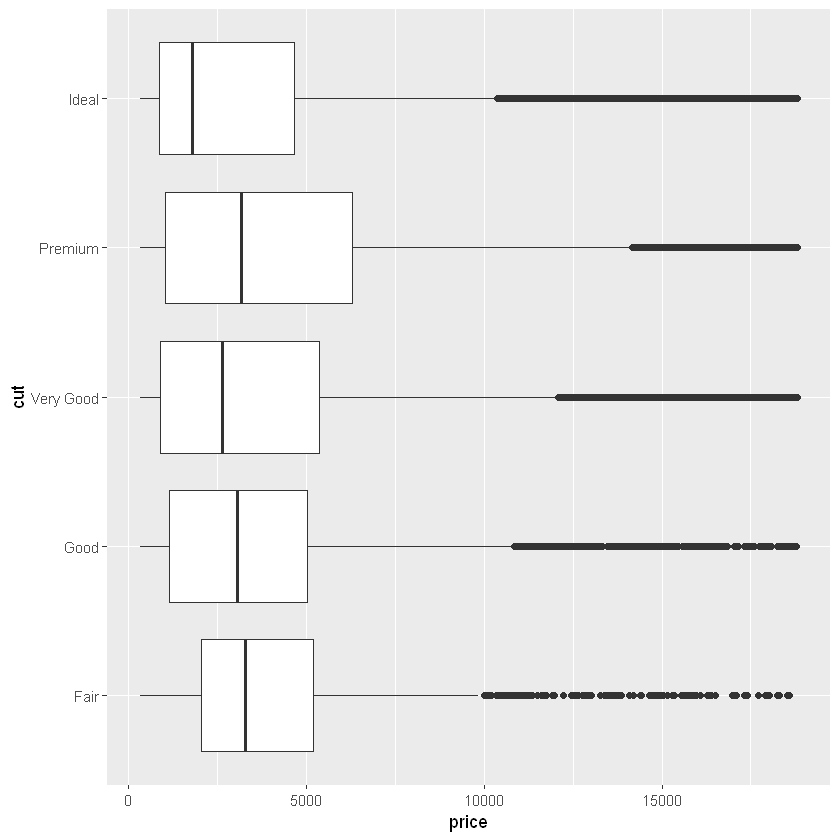

In [77]:
last_plot() + coord_flip()

#### 히스토그램(Histogram)

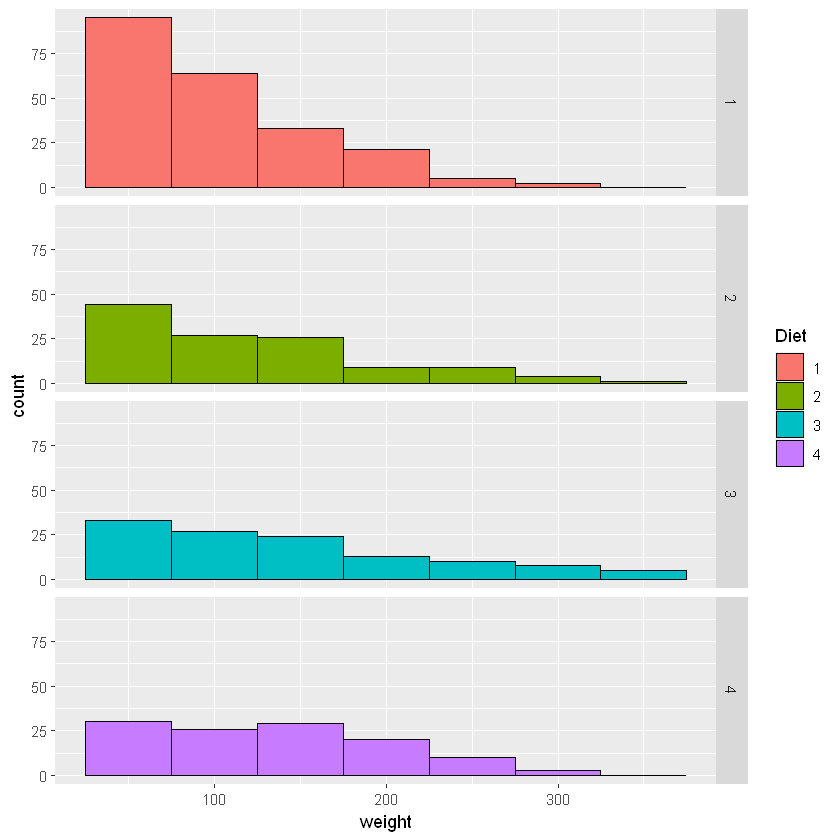

In [29]:
ggplot(subset(ChickWeight, Time=21), aes(x=weight, fill=Diet)) + geom_histogram(colour='black', binwidth = 50) + facet_grid(Diet~.)

#### 다축(Multiple Axis)

In [122]:
# 사용 데이터.
time = seq(7000, 3400, -200)
pop = c(200, 400, 450, 500, 300, 100, 400, 700, 830, 1200, 400, 350, 200, 700, 370, 800, 200, 100, 120)
grp = c(2, 5, 8, 3, 2, 2, 4, 7, 9, 4, 4, 2, 2, 7, 5, 12, 5, 4, 4)
med = c(1.2, 1.3, 1.2, 0.9, 2.1, 1.4, 2.9, 3.4, 2.1, 1.1, 1.2, 1.5, 1.2, 0.9, 0.5, 3.3, 2.2, 1.1, 1.2)
par(mar = c(5, 12, 4, 4) + 0.1)

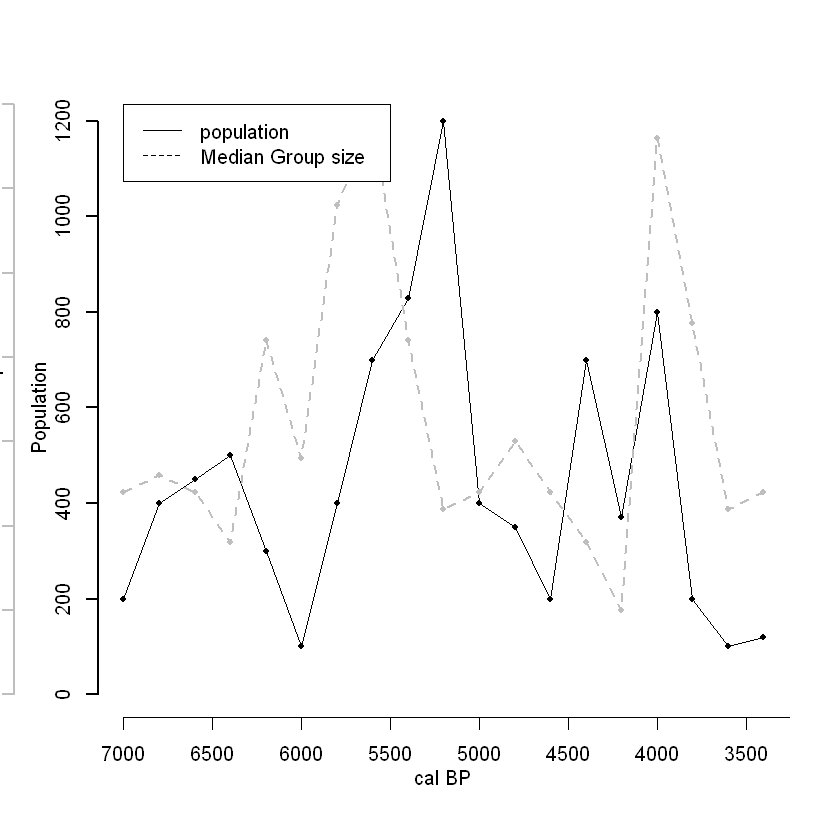

In [134]:
# 축을 지정하지 않은 그래프 생성.
plot(time, pop, axes=F, xlim=c(7000, 3400), ylim=c(0, max(pop)), xlab='', ylab='', type='l', col='black', main='')

# 그래프에 점 추가.
points(time, pop, pch=20, col='black')

# 그래프의 y축 생성. => axis() 이용.
axis(2, ylim=c(0, max(pop)), col='black', lwd=2)

# y축 이름을 지정. => mtext() 이용.
mtext(2, text='Population', line=2)

# 아직 축을 지정하지 않은 두 번째 그래프 생성.
par(new=T)
plot(time, med, axes=F, xlim=c(7000, 3400), ylim=c(0, max(med)), xlab='', ylab='', type='l', lty=2, lwd=2, col='gray', main='')

# 두 번째 그래프에 점 추가.
points(time, med, pch=20, col='gray')

# 두 번째 그래프의 y축 생성.
axis(2, ylim=c(0, max(med)), col='gray', lwd=2, line=3.5)

# 두 번째 y축의 이름 지정.
mtext(2, text='Median Group size', line=4)

# x축 생성.
axis(1, pretty(range(time), 10))

# x축 이름 지정.
mtext(side=1, text='cal BP', col='black', line=2)

# 범례 추가.
legend(x=7000, y=3.5, legend=c('population', 'Median Group size'), lty=c(1, 2))

In [139]:
install.packages('aplpack')
library(aplpack)

Warning message:
"package 'aplpack' is in use and will not be installed"

#### 줄기-잎 그림

In [140]:
# 줄기-잎 그림.
score = c(1,2,3,4,10,2,30,42,56,3,50,90,87,22,48,99,61,78,55,77)
stem.leaf(score)

1 | 2: represents 12
 leaf unit: 1
            n: 20
   6     0 | 122334
   7     1 | 0
   8     2 | 2
   9     3 | 0
  (2)    4 | 28
   9     5 | 056
   6     6 | 1
   5     7 | 78
   3     8 | 7
   2     9 | 09


#### 얼굴 그림

effect of variables:
 modified item       Var       
 "height of face   " "N.Amer"  
 "width of face    " "Europe"  
 "structure of face" "Asia"    
 "height of mouth  " "S.Amer"  
 "width of mouth   " "Oceania" 
 "smiling          " "Africa"  
 "height of eyes   " "Mid.Amer"
 "width of eyes    " "N.Amer"  
 "height of hair   " "Europe"  
 "width of hair   "  "Asia"    
 "style of hair   "  "S.Amer"  
 "height of nose  "  "Oceania" 
 "width of nose   "  "Africa"  
 "width of ear    "  "Mid.Amer"
 "height of ear   "  "N.Amer"  


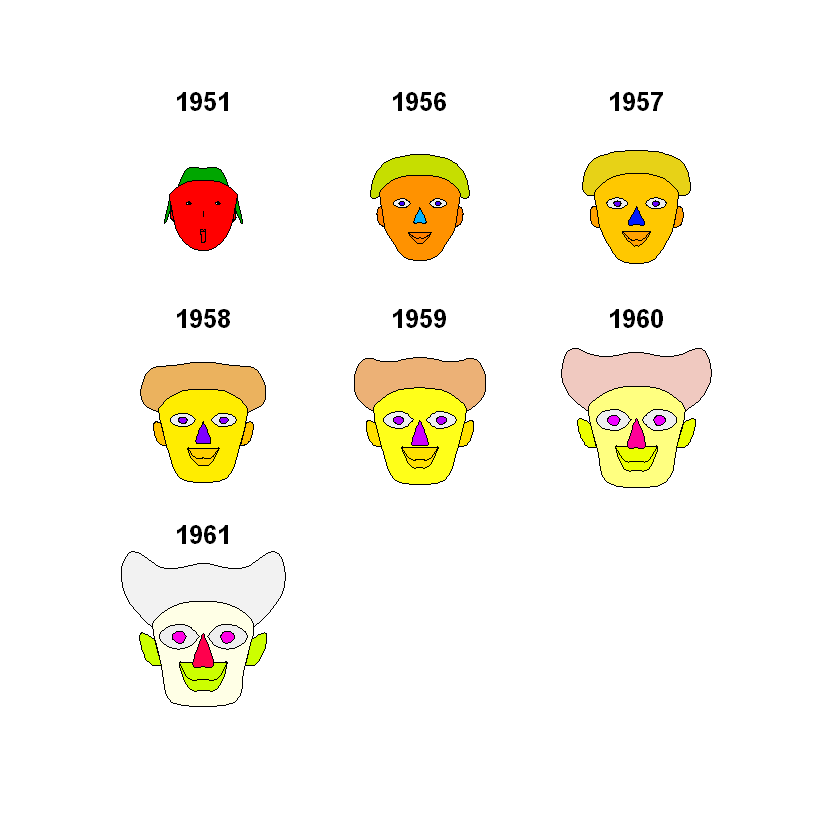

In [143]:
faces(WorldPhones)

#### 별 그림

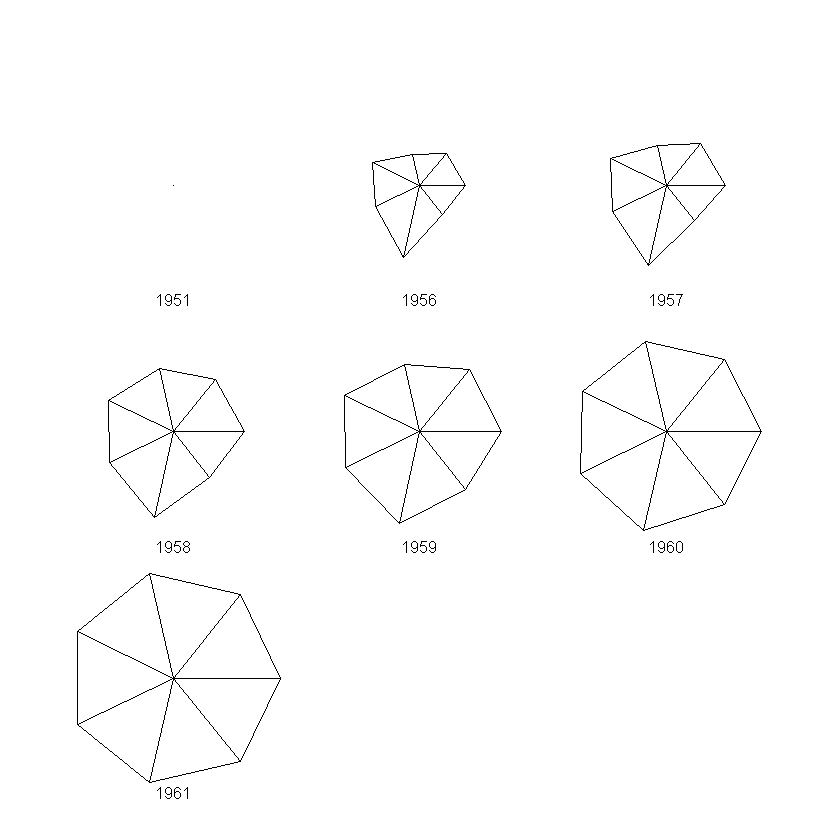

In [145]:
stars(WorldPhones)